# Correlation of S1 and S2 signals

Original file name: **Correlation.ipynb**

Author: Zhuoran Feng

First committed: 23/06/2020

This notebook uses the data from 
1. **XENON1T_S1-S2-classification_Zhuoran.ipynb** 
2. **XENON1T_S1-S2-classification_single_Zhuoran.ipynb**

and does a simple analysis of the recorded peaks. All the plots in folder: plots

In [1]:
import Zip
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import time
import math
import pickle
from preface import *

# Channels in the detector
det_ch = { 'tpc': list(range(0, 247+1)), 'veto': list(range(248, 253+1)), 
          'sum_wv': [254], 'busy_on': [255], 'busy_off': [256],
          'hev_on': [257], 'hev_off': [258], 'muon_veto_trigger': [259], } 
n_channels = 260

## Neutron Generator, channel 254

In [2]:
with open('NG_data_new.p', 'rb') as fp:
    NG_info = pickle.load(fp)

In [3]:
print(NG_info[300])

{'event': 460, 's1': 48618.0, 's2': 213835.0, 's1_position': 100055, 's2_position': 139300}


### Drift time

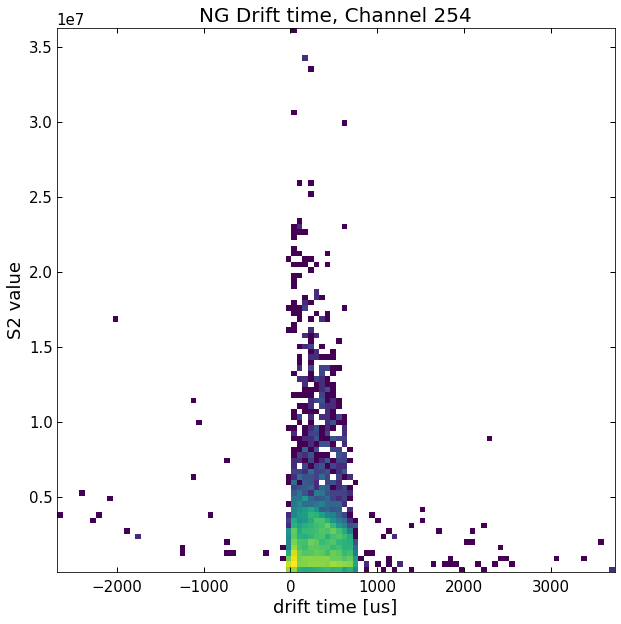

In [4]:
# Drift time
#%matplotlib inline
s1 = []
s2 = []
drift = []
for info in NG_info:
    drift.append(1e-2*(info['s2_position']-info['s1_position']))
    s1.append(info['s1'])
    s2.append(info['s2'])
fig, ax = plt.subplots(figsize = (10.,10.))
ax.hist2d(drift, s2, bins=(100,100), norm=mpl.colors.LogNorm())
ax.set_xlabel("drift time [us]", fontsize = 18)
ax.set_ylabel('S2 value', fontsize = 18)
ax.set_title('NG Drift time, Channel 254', fontsize = 20)
#ax2.set_xlim(0., 200000)
fig.savefig('plots/NG_drift_254.png', bbox_inches = 'tight')
plt.show()

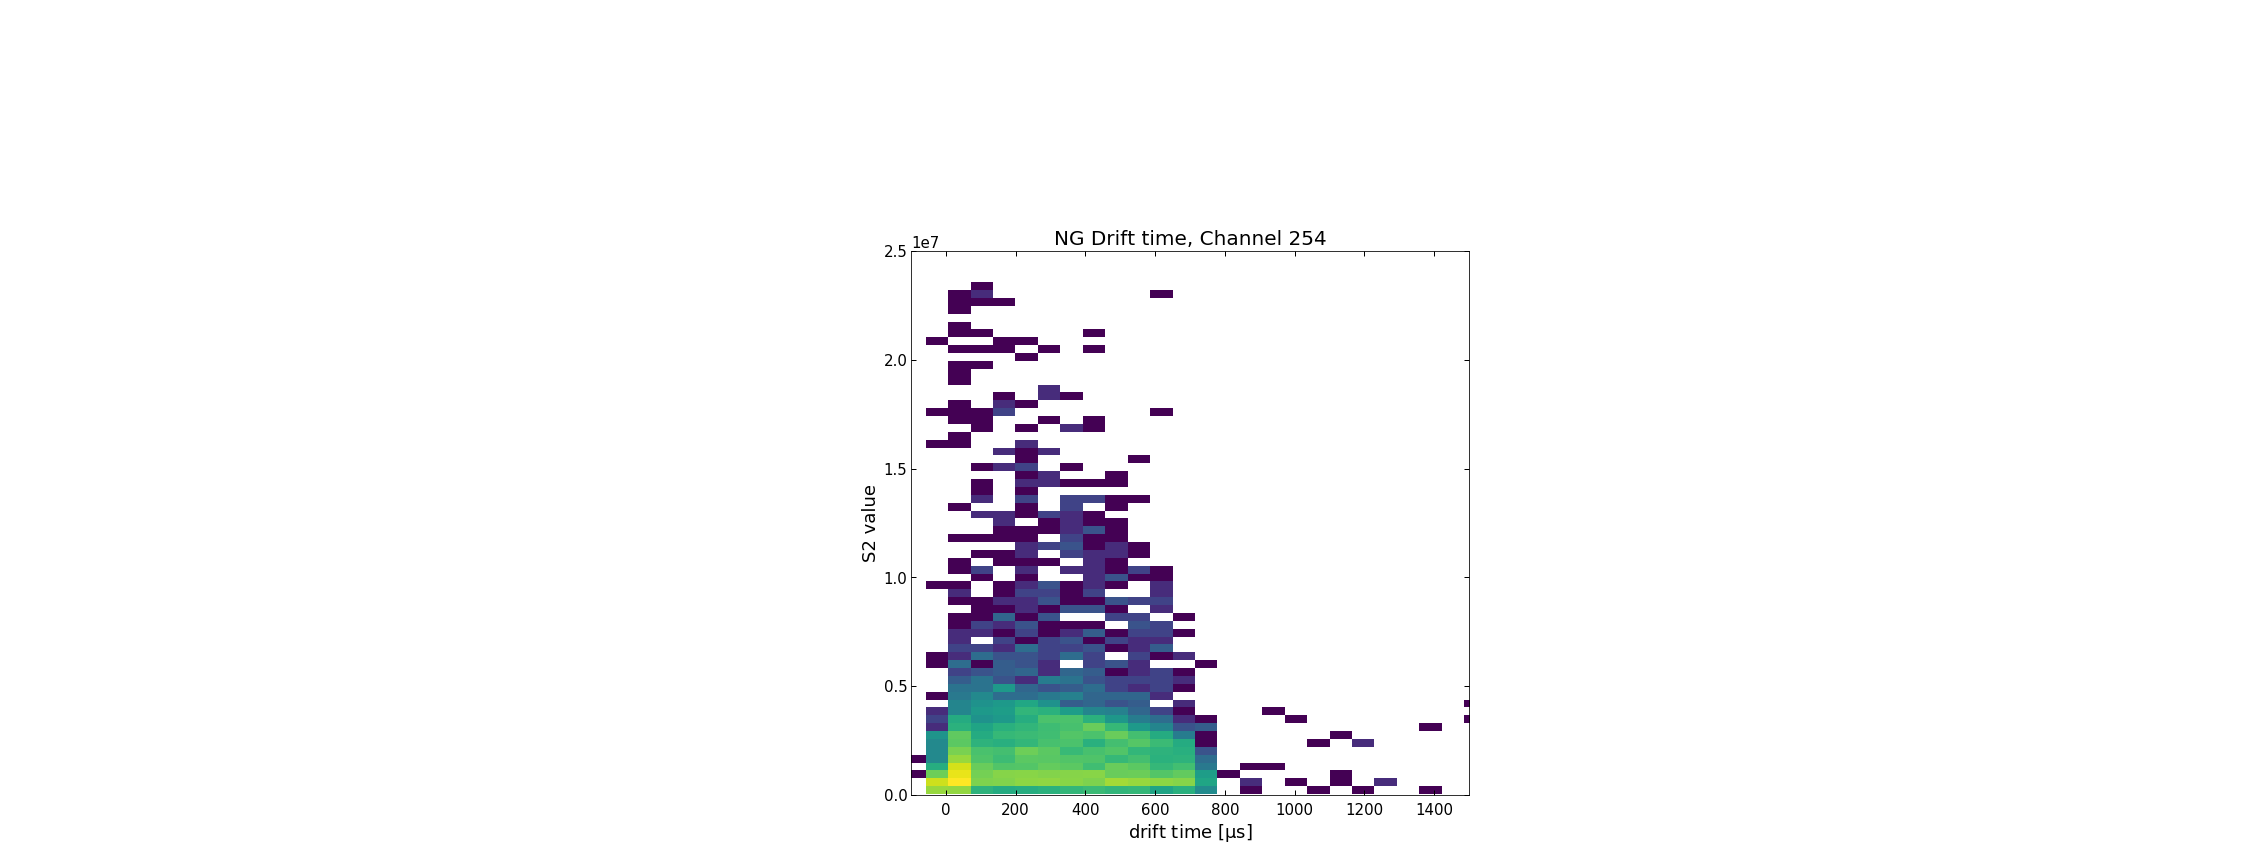

In [11]:
# zoom in

fig2, ax2 = plt.subplots(figsize = (10.,10.))
ax2.hist2d(drift, s2, bins=(100,100), norm=mpl.colors.LogNorm())
ax2.set_xlabel('drift time '+r'$[\mathrm{\mu s}]$', fontsize = 18)
ax2.set_xlim(-100., 1500.)
ax2.set_ylim(0., 2.5e7)

ax2.set_ylabel('S2 value', fontsize = 18)
ax2.set_title('NG Drift time, Channel 254', fontsize = 20)
#ax2.set_xlim(0., 200000)
fig2.savefig('plots/NG_drift_254_zoomin.png', dpi = 300)
plt.show()

### S1 vs S2

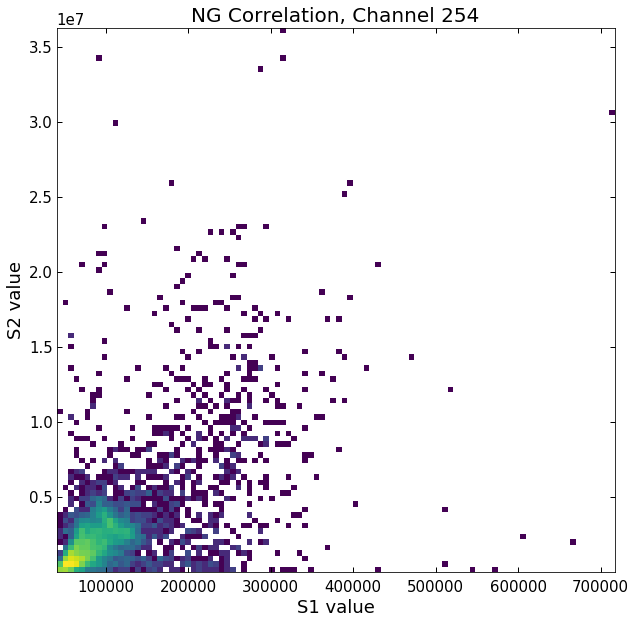

In [20]:
fig3, ax3 = plt.subplots(figsize = (10.,10.))
ax3.hist2d(s1, s2, bins=(100,100), norm=mpl.colors.LogNorm())
ax3.set_xlabel('S1 value', fontsize = 18)
ax3.set_ylabel('S2 value', fontsize = 18)
ax3.set_title('NG Correlation, Channel 254', fontsize = 20)
#ax3.set_xlim(0., 200000)
fig3.savefig('plots/NG_s1s2_254.png', bbox_inches = 'tight')

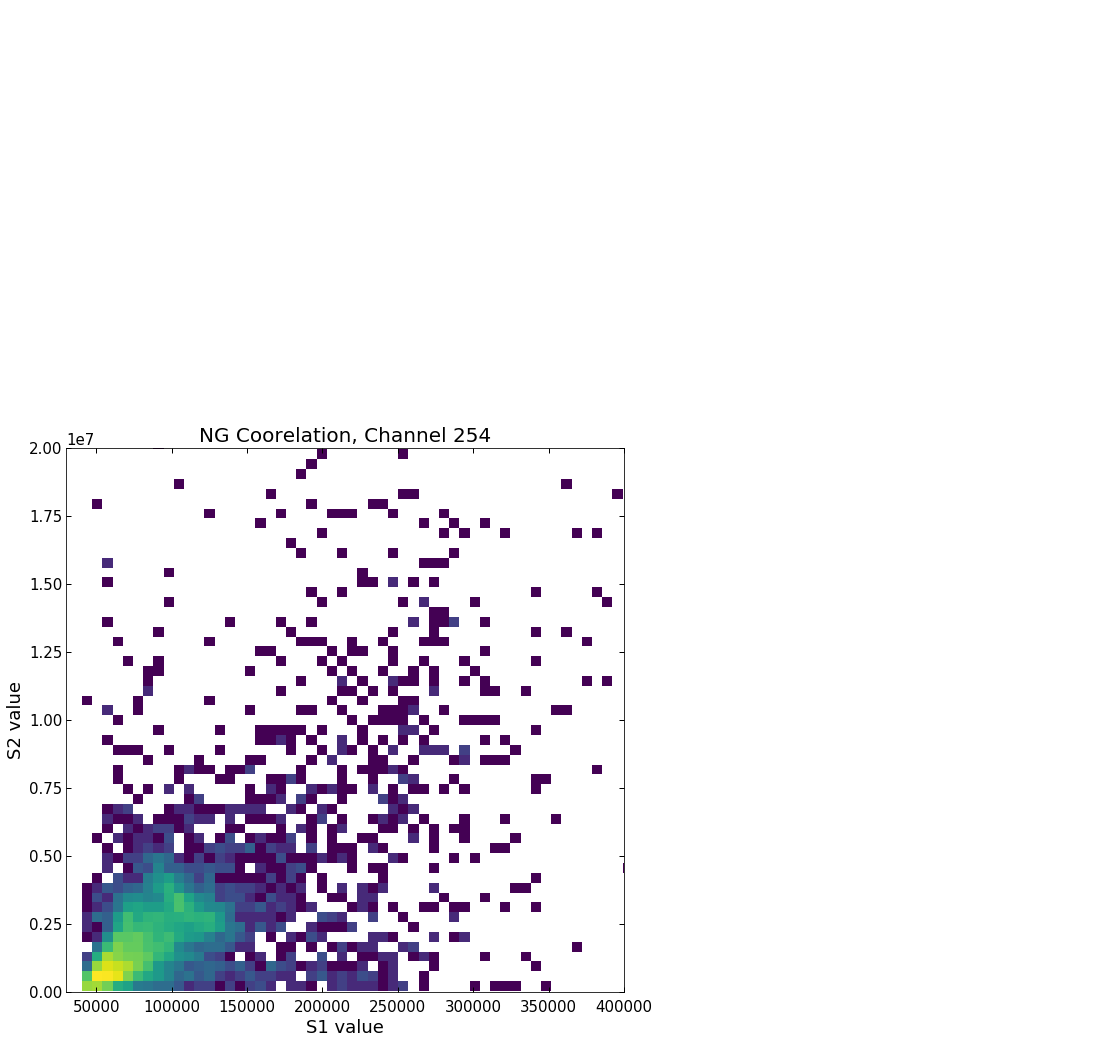

In [27]:
fig4, ax4 = plt.subplots(figsize = (10.,10.))
ax4.hist2d(s1, s2, bins=(100,100), norm=mpl.colors.LogNorm())
ax4.set_xlabel('S1 value', fontsize = 18)
ax4.set_ylabel('S2 value', fontsize = 18)
ax4.set_xlim(30000., 400000.)
ax4.set_ylim(0., 2e7)
ax4.set_title('NG Coorelation, Channel 254', fontsize = 20)
#ax3.set_xlim(0., 200000)
fig4.savefig('plots/NG_s1s2_254_zoomin.png', dpi = 300)
plt.show()

### $\log_{10} \text{(S2/S1)}$ vs S1

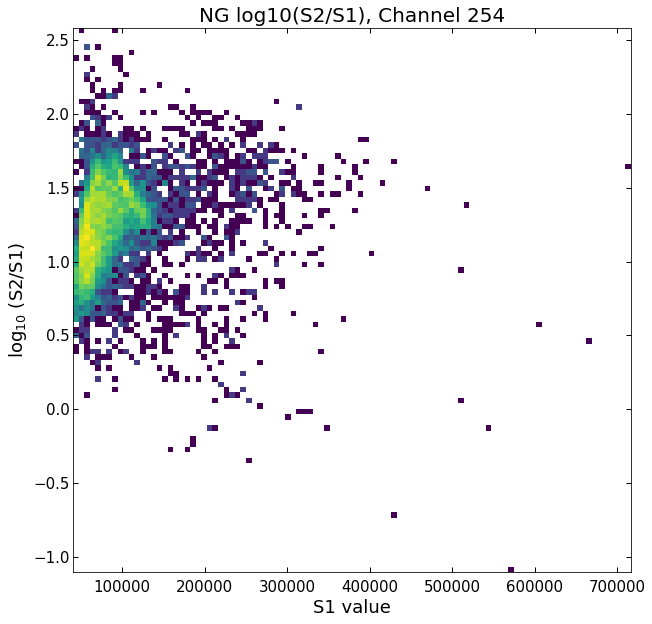

In [6]:
fig5, ax5 = plt.subplots(figsize = (10.,10.))
ax5.hist2d(s1, np.log10(np.asarray(s2)/np.asarray(s1)), bins=(100,100), norm=mpl.colors.LogNorm())
ax5.set_xlabel('S1 value', fontsize = 18)
ax5.set_ylabel(r'$\log_{10}\ \mathrm{(S2/S1)}$', fontsize = 18)
#ax4.set_xlim(0., 200000)
#ax4.set_ylim(0., 1e7)
ax5.set_title('NG log10(S2/S1), Channel 254', fontsize = 20)
fig5.savefig('plots/NG_s2overs1_254.png', bbox_inches = 'tight')
plt.show()

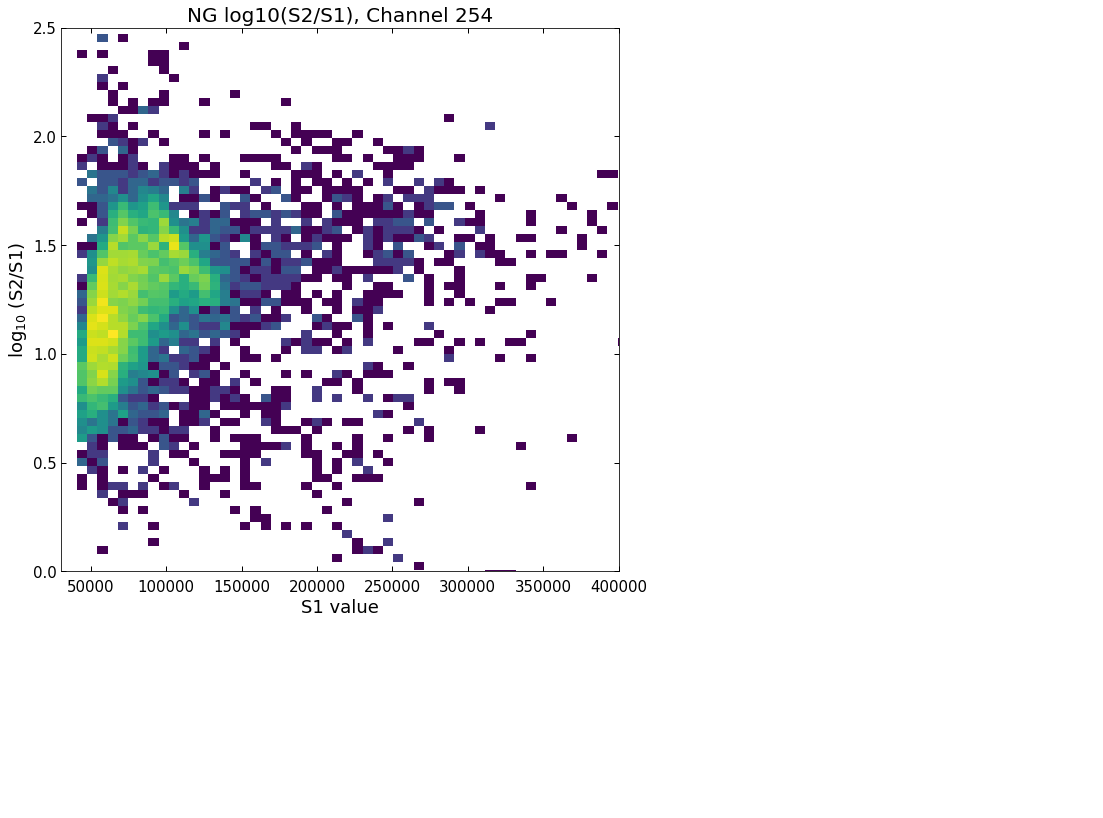

In [28]:
fig6, ax6 = plt.subplots(figsize = (10.,10.))
ax6.hist2d(s1, np.log10(np.asarray(s2)/np.asarray(s1)), bins=(100,100), norm=mpl.colors.LogNorm())
ax6.set_xlabel('S1 value', fontsize = 18)
ax6.set_ylabel(r'$\log_{10}\ \mathrm{(S2/S1)}$', fontsize = 18)
ax6.set_xlim(30000., 400000)
ax6.set_ylim(0., 2.5)
ax6.set_title('NG log10(S2/S1), Channel 254', fontsize = 20)
fig6.savefig('plots/NG_s2overs1_254_zoomin.png', dpi = 300)
plt.show()

## NG, only the strongest channel

In [7]:
with open('NG_data_single.p', 'rb') as fp:
    NG_single = pickle.load(fp)

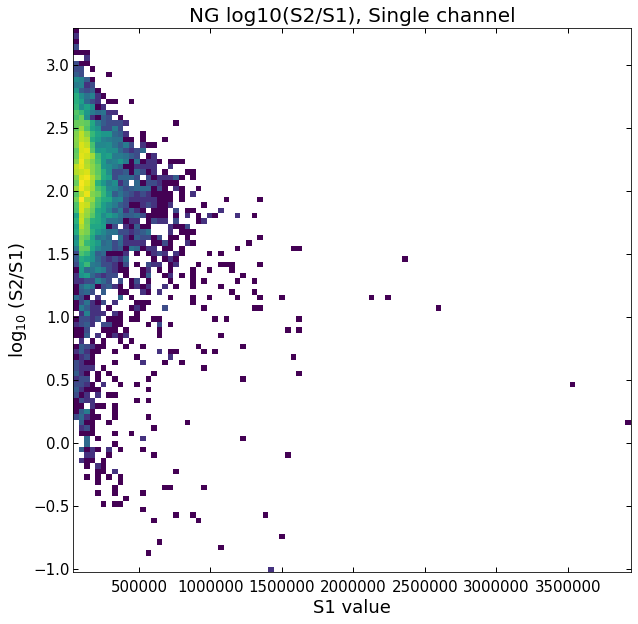

In [9]:
s1s = []
s2s = []
for info in NG_single:
    s1s.append(info['s1'])
    s2s.append(info['s2'])

figs, axs = plt.subplots(figsize = (10.,10.))
axs.hist2d(s1s, np.log10(np.asarray(s2s)/np.asarray(s1s)), bins=(100,100), norm=mpl.colors.LogNorm())
axs.set_xlabel('S1 value', fontsize = 18)
axs.set_ylabel(r'$\log_{10}\ \mathrm{(S2/S1)}$', fontsize = 18)
#ax4.set_xlim(0., 200000)
#ax4.set_ylim(0., 1e7)
axs.set_title('NG log10(S2/S1), Single channel', fontsize = 20)
figs.savefig('plots/NG_s2overs1_single.png', bbox_inches = 'tight')
plt.show()

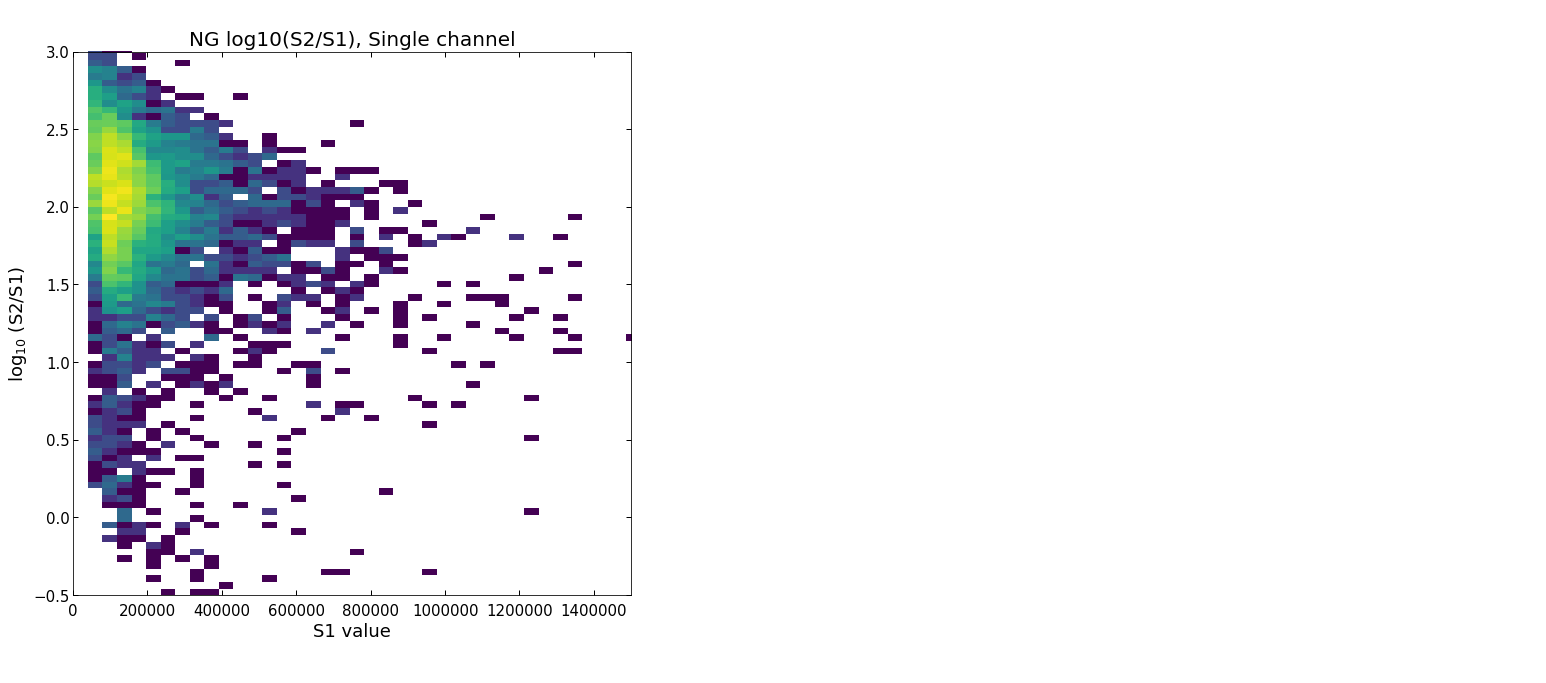

In [37]:
# zoom in

figsz, axsz = plt.subplots(figsize = (10.,10.))
axsz.hist2d(s1s, np.log10(np.asarray(s2s)/np.asarray(s1s)), bins=(100,100), norm=mpl.colors.LogNorm())
axsz.set_xlabel('S1 value', fontsize = 18)
axsz.set_ylabel(r'$\log_{10}\ \mathrm{(S2/S1)}$', fontsize = 18)
axsz.set_xlim(0., 1500000)
axsz.set_ylim(-0.5, 3)
axsz.set_title('NG log10(S2/S1), Single channel', fontsize = 20)
figsz.savefig('plots/NG_s2overs1_single_zoomin.png', dpi = 300)
plt.show()

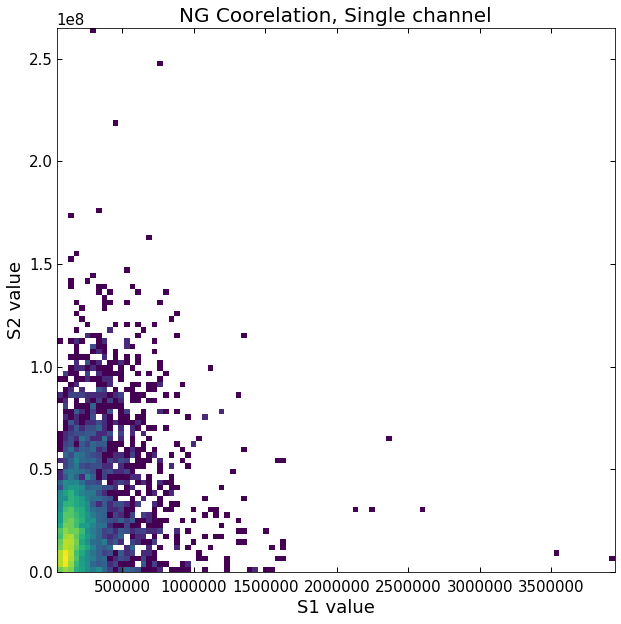

In [10]:
figs3, axs3 = plt.subplots(figsize = (10.,10.))
axs3.hist2d(s1s, s2s, bins=(100,100), norm=mpl.colors.LogNorm())
axs3.set_xlabel('S1 value', fontsize = 18)
axs3.set_ylabel('S2 value', fontsize = 18)
axs3.set_title('NG Coorelation, Single channel', fontsize = 20)
#axs3.set_xlim(0., 200000)
figs3.savefig('plots/NG_s1s2_single.png', bbox_inches = 'tight')

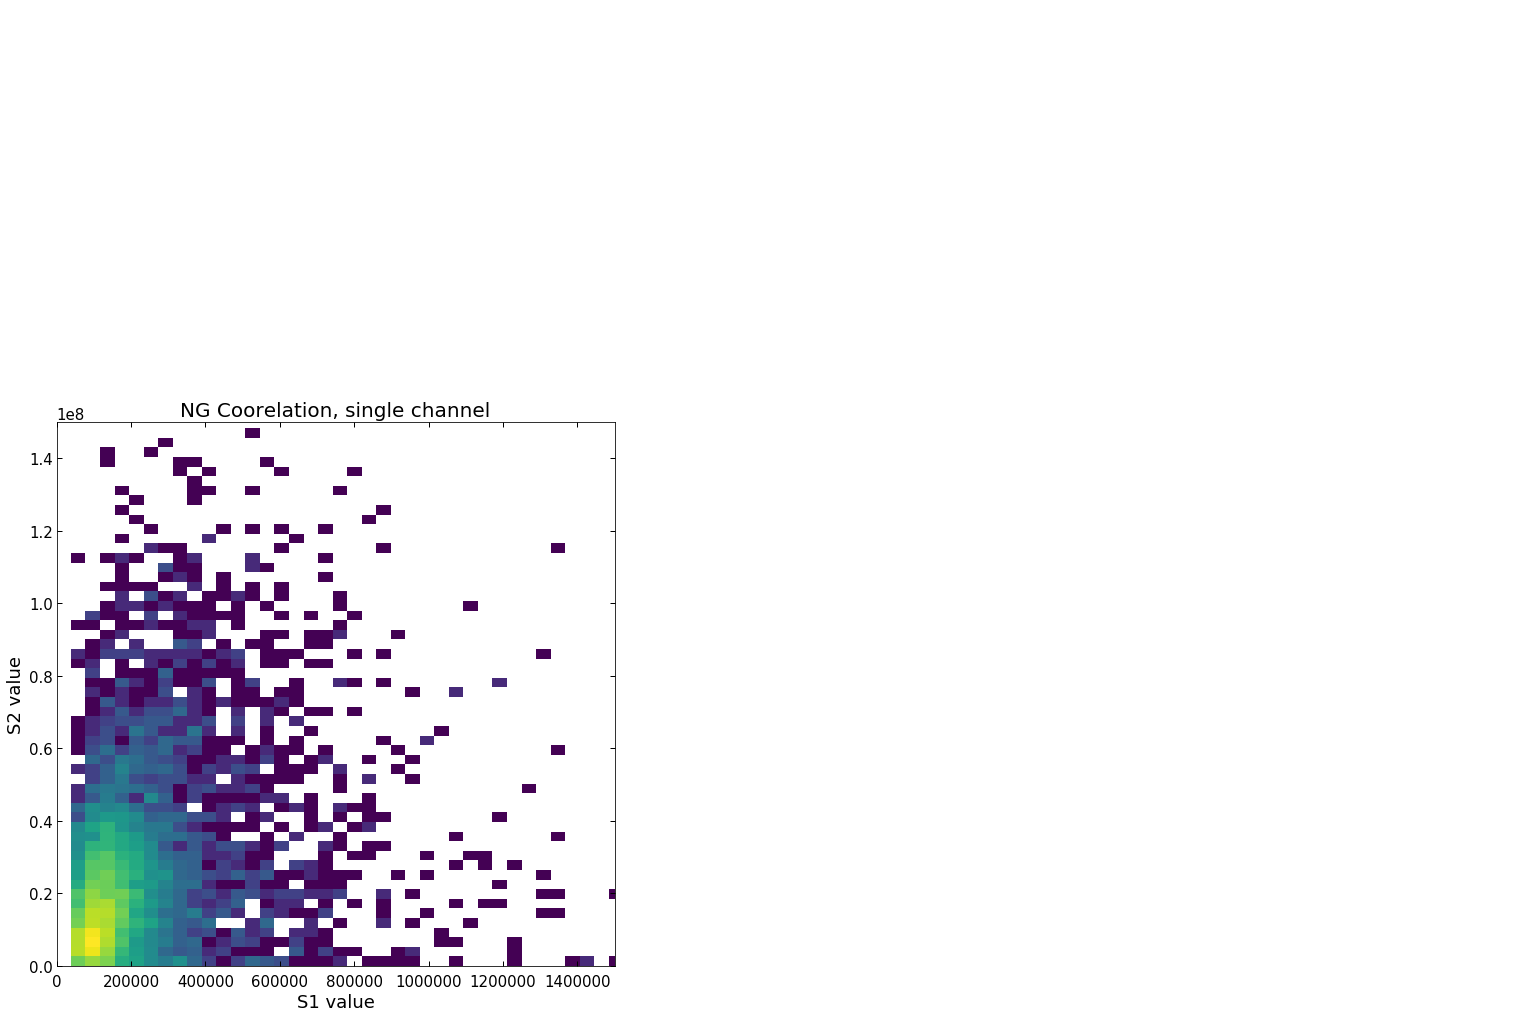

In [35]:
figs4, axs4 = plt.subplots(figsize = (10.,10.))
axs4.hist2d(s1s, s2s, bins=(100,100), norm=mpl.colors.LogNorm())
axs4.set_xlabel('S1 value', fontsize = 18)
axs4.set_ylabel('S2 value', fontsize = 18)
axs4.set_xlim(0., 1500000.)
axs4.set_ylim(0., 1.5e8)
axs4.set_title('NG Coorelation, single channel', fontsize = 20)
#ax3.set_xlim(0., 200000)
figs4.savefig('plots/NG_s1s2_single_zoomin.png', dpi = 300)
plt.show()

## Rn220, Channel 254

In [11]:
with open('Rn220_data_new.p', 'rb') as fp2:
    Rn220_info = pickle.load(fp2)
print(Rn220_info[200])

{'event': 343, 's1': 58677.0, 's2': 361574.0, 's1_position': 100053, 's2_position': 169954}


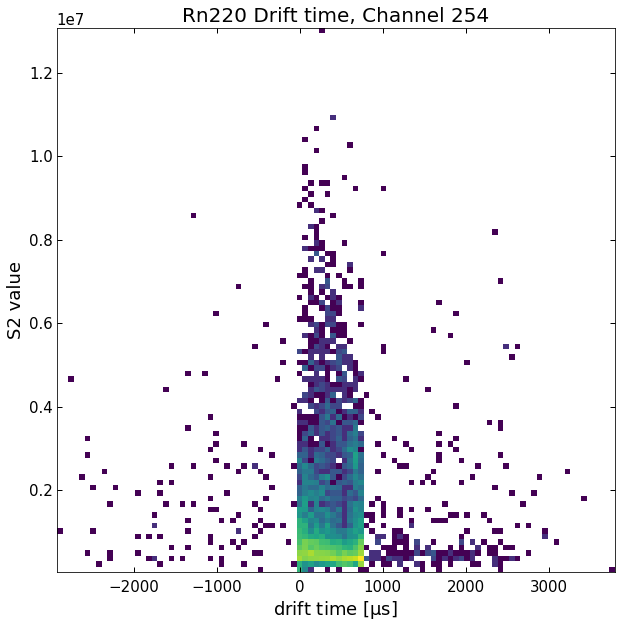

In [12]:
# Drift time
#%matplotlib inline
s1r = []
s2r = []
driftr = []
for info in Rn220_info:
    driftr.append(1e-2*(info['s2_position']-info['s1_position']))
    s1r.append(info['s1'])
    s2r.append(info['s2'])
fig2r, ax2r = plt.subplots(figsize = (10.,10.))
ax2r.hist2d(driftr, s2r, bins=(100,100), norm=mpl.colors.LogNorm())
ax2r.set_xlabel('drift time '+r'$[\mathrm{\mu s}]$', fontsize = 18)
ax2r.set_ylabel('S2 value', fontsize = 18)
ax2r.set_title('Rn220 Drift time, Channel 254', fontsize = 20)
#ax2.set_xlim(0., 200000)
fig2r.savefig('plots/Rn220_drift_254.png', bbox_inches = 'tight')
plt.show()

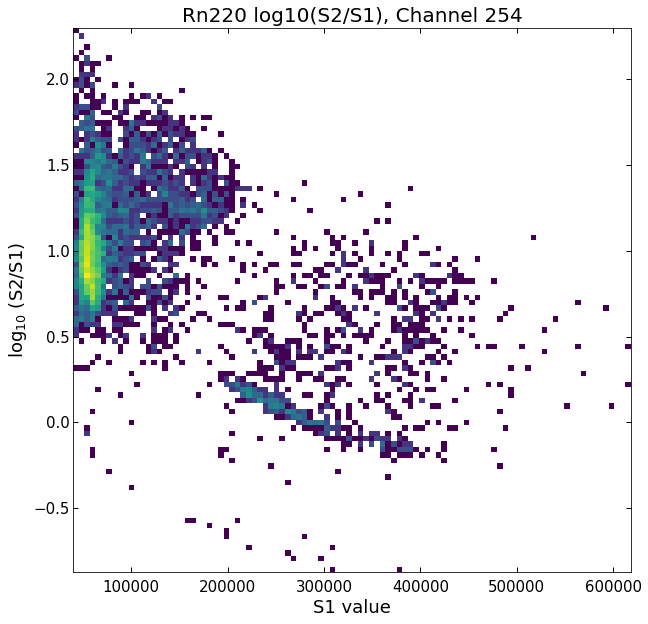

In [13]:
fig52, ax52 = plt.subplots(figsize = (10.,10.))
ax52.hist2d(s1r, np.log10(np.asarray(s2r)/np.asarray(s1r)), bins=(100,100), norm=mpl.colors.LogNorm())
ax52.set_xlabel('S1 value', fontsize = 18)
ax52.set_ylabel(r'$\log_{10}\ \mathrm{(S2/S1)}$', fontsize = 18)
#ax4.set_xlim(0., 200000)
#ax4.set_ylim(0., 1e7)
ax52.set_title('Rn220 log10(S2/S1), Channel 254', fontsize = 20)
fig52.savefig('plots/Rn220_s2overs1_254.png', bbox_inches = 'tight')
plt.show()

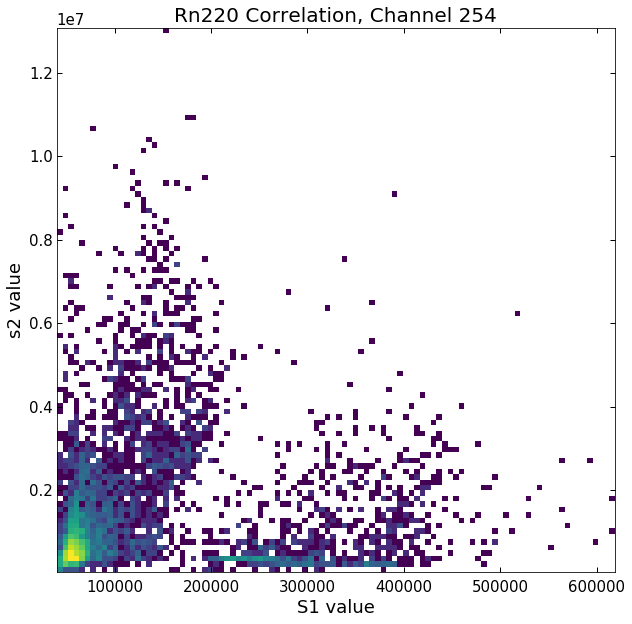

In [14]:
fig32, ax32 = plt.subplots(figsize = (10.,10.))
ax32.hist2d(s1r, s2r, bins=(100,100), norm=mpl.colors.LogNorm())
ax32.set_xlabel('S1 value', fontsize = 18)
ax32.set_ylabel('s2 value', fontsize = 18)
#ax3.set_xlim(0., 200000)
ax32.set_title('Rn220 Correlation, Channel 254', fontsize = 20)
fig32.savefig('plots/Rn220_s1s2_254.png', bbox_inches = 'tight')

plt.show()

## Rn220, only the strongest channel

In [15]:
with open('Rn220_data_single.p', 'rb') as fp2:
    Rn220_single = pickle.load(fp2)
print(Rn220_single[200])

{'event': 344, 's1': 120681.34551770405, 's2': 1964337.7088648125, 's1_position': 100051, 's2_position': 148816}


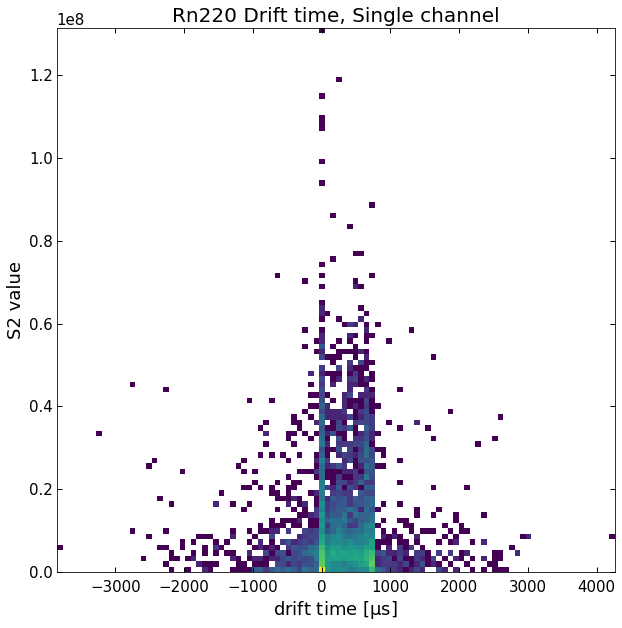

In [17]:
# Drift time
#%matplotlib inline
s1r2 = []
s2r2 = []
driftr2 = []
for info in Rn220_single:
    driftr2.append(1e-2*(info['s2_position']-info['s1_position']))
    s1r2.append(info['s1'])
    s2r2.append(info['s2'])
fig2r2, ax2r2 = plt.subplots(figsize = (10.,10.))
ax2r2.hist2d(driftr2, s2r2, bins=(100,100), norm=mpl.colors.LogNorm())
ax2r2.set_xlabel('drift time '+r'$[\mathrm{\mu s}]$', fontsize = 18)
ax2r2.set_ylabel('S2 value', fontsize = 18)
ax2r2.set_title('Rn220 Drift time, Single channel', fontsize = 20)
#ax2.set_xlim(0., 200000)
fig2r2.savefig('plots/Rn220_drift_single.png', bbox_inches = 'tight')
plt.show()

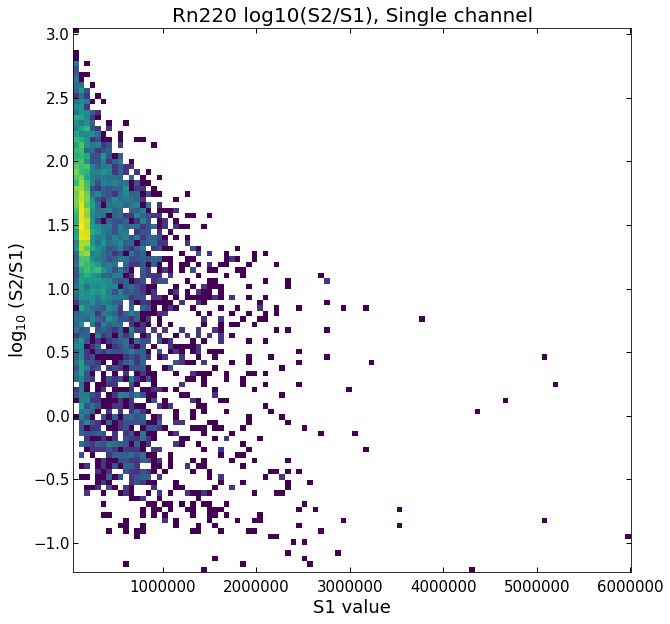

In [18]:
fig522, ax522 = plt.subplots(figsize = (10.,10.))
ax522.hist2d(s1r2, np.log10(np.asarray(s2r2)/np.asarray(s1r2)), bins=(100,100), norm=mpl.colors.LogNorm())
ax522.set_xlabel('S1 value', fontsize = 18)
ax522.set_ylabel(r'$\log_{10}\ \mathrm{(S2/S1)}$', fontsize = 18)
#ax4.set_xlim(0., 200000)
#ax4.set_ylim(0., 1e7)
ax522.set_title('Rn220 log10(S2/S1), Single channel', fontsize = 20)
fig522.savefig('plots/Rn220_s2overs1_single.png', bbox_inches = 'tight')
plt.show()

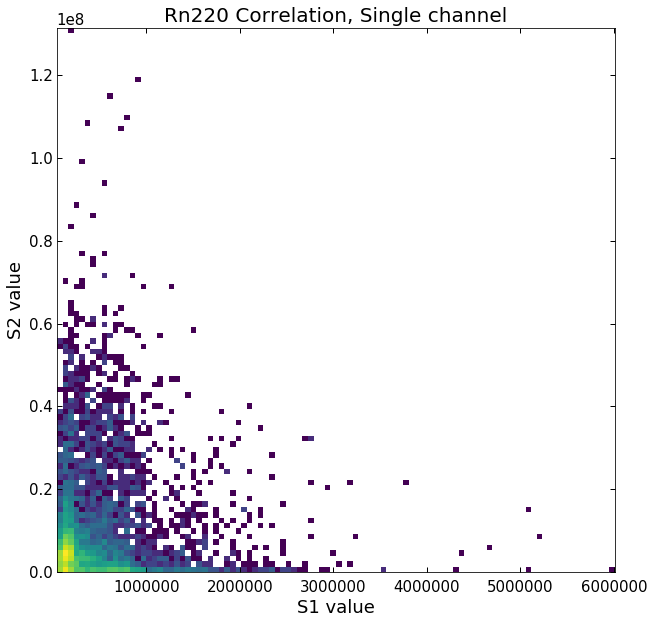

In [19]:
fig322, ax322 = plt.subplots(figsize = (10.,10.))
ax322.hist2d(s1r2, s2r2, bins=(100,100), norm=mpl.colors.LogNorm())
ax322.set_xlabel('S1 value', fontsize = 18)
ax322.set_ylabel('S2 value', fontsize = 18)
#ax3.set_xlim(0., 200000)
ax322.set_title('Rn220 Correlation, Single channel', fontsize = 20)
fig322.savefig('plots/Rn220_s1s2_single.png', bbox_inches = 'tight')

plt.show()